In [137]:
# loadings best model
best_random_cv = pickle.load(open(r'/home/disk/eos4/jkcm/Data/MEASURES/models/random_CV_search_pca_0.472_8747447530989.pickle', 'rb'))

UnpicklingError: invalid load key, '\x00'.

In [82]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import plot_partial_dependence

%load_ext autoreload
%autoreload 2
print("we workin'!")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
we workin'!


In [15]:
labels={0: 'Closed-cellular MCC', 1: 'Clustered cumulus', 2: 'Disorganized MCC',
        3: 'Open-cellular MCC', 4: 'Solid Stratus', 5: 'Suppressed Cu'}

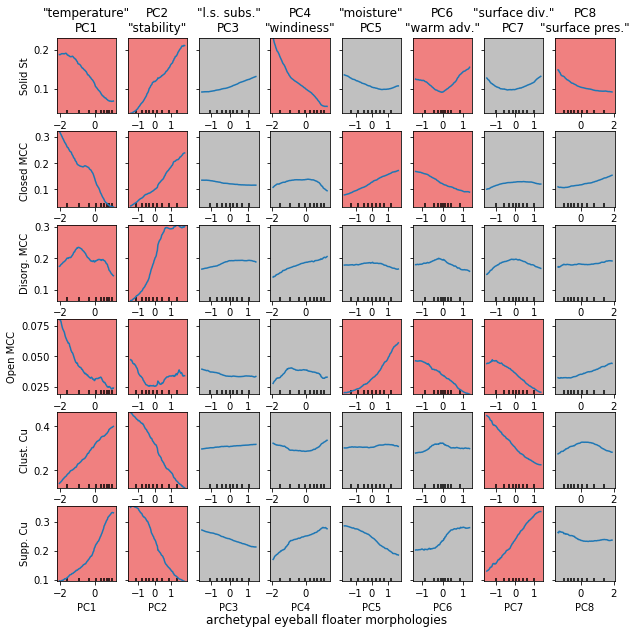

In [203]:
fig, ax = plt.subplots(figsize=(10,10), ncols=8, nrows=6, sharey='row')
# fig = plt.figure()
# plt.close(fig)
short_labels = {0: 'Closed MCC ', 1: 'Clust. Cu', 2: 'Disorg. MCC',
        3: 'Open MCC', 4: 'Solid St', 5: 'Supp. Cu'}

cols = ['"temperature"\nPC1', 'PC2\n"stability"', '"l.s. subs."\nPC3', 'PC4\n"windiness"', '"moisture"\nPC5', 'PC6\n"warm adv."', 
        '"surface div."\nPC7', 'PC8\n"surface pres."']

ordering = [4, 0, 2, 3, 1, 5]

probs = {4: 0.1, 0: 0.12, 2: 0.18, 3: 0.03, 1: 0.32, 5: 0.25}
    
ct = 1
sigs = []
pd_dict = {}
for i,cat in enumerate(ordering):
    pdp = pickle.load(open(f'/home/disk/eos4/jkcm/Data/MEASURES/pdp/ver1_pdp_target{cat}.0.pickle', "rb" ));
    pd_dict[cat] = pdp
    plt.close(pdp.figure_)
    pdp.plot(ax=ax[i,:])
    ax[i,0].set_ylabel(short_labels[cat])#+'\n likelihood')
    
    mean_prob = probs[cat]
    for axi in ax[i,:]:
        line_data = axi.get_children()[1].get_ydata()
        sig = np.ptp(line_data)/mean_prob
        sigs.append(sig)
        if sig < 0.5:
            axi.set_facecolor('silver')
        else:
            axi.set_facecolor('lightcoral')
    
    
    
for axi in ax[:,1:].flatten():
    axi.set_ylabel('')

# for i, lab in short_labels.items():
#     ax[i,0]
    
for j, mode in enumerate(cols):
    ax[0,j].set_title(mode)
    
fig.suptitle('archetypal eyeball floater morphologies', y=0.08)
# fig.show()
fig.subplots_adjust(hspace=0.24)
ptps = []

fig.savefig('/home/disk/p/jkcm/plots/dissertation/pdplots_1d.png', bbox_inches='tight')

In [ ]:
wal

In [99]:
#load classified data
df = pickle.load(open(f'/home/disk/eos4/jkcm/Data/MEASURES/models/rf_ver1_classified_data.pickle', "rb" ))
vars_to_use = ['MERRA2_sfc_div', 'MERRA2_div_700', 'MERRA2_SST', 'MERRA2_EIS', 'MERRA2_LTS', 'MERRA2_RH_700', 
               'MERRA2_WSPD_10M', 'MERRA2_PS',  'MERRA2_TQV', 'MERRA2_T2M', 'MERRA2_M', 'MERRA2_T_adv', 'MERRA2_T_700']  # these are the variables to train on
var_labels = [ 'Sfc. div.',      '700mb div',      'SST',         'EIS',       'LTS',        '700mb RH', 
               '10m wspd.',       'Sfc. pres.', 'Col. Q$_V$', '2m T',       'MCAO idx', 'T$_{adv}$',    '700mb T']
var_units = [  's$^{-1}$',       's$^{-1}$',    'K',              'K',         'K',          '%',       
               'm s$^{-1}$',      'Pa',         'kg m$^{-3}$', 'K',         'K',         'K s$^{-1}$',  'K']

# var_dict = 


ordering = [4, 0, 2, 3, 1, 5]



short_labels = {0: 'Closed MCC ', 1: 'Clust. Cu', 2: 'Disorg. MCC',
                3: 'Open MCC', 4: 'Solid St', 5: 'Supp. Cu'}
df.columns

Index(['MERRA2_sfc_div', 'MERRA2_div_700', 'MERRA2_SST', 'MERRA2_EIS',
       'MERRA2_LTS', 'MERRA2_RH_700', 'MERRA2_WSPD_10M', 'MERRA2_PS',
       'MERRA2_TQV', 'MERRA2_T2M', 'MERRA2_M', 'MERRA2_T_adv', 'MERRA2_T_700',
       'low_cf', 'cat', 'lat', 'lon', 'rf_prob', 'rf_pred'],
      dtype='object')

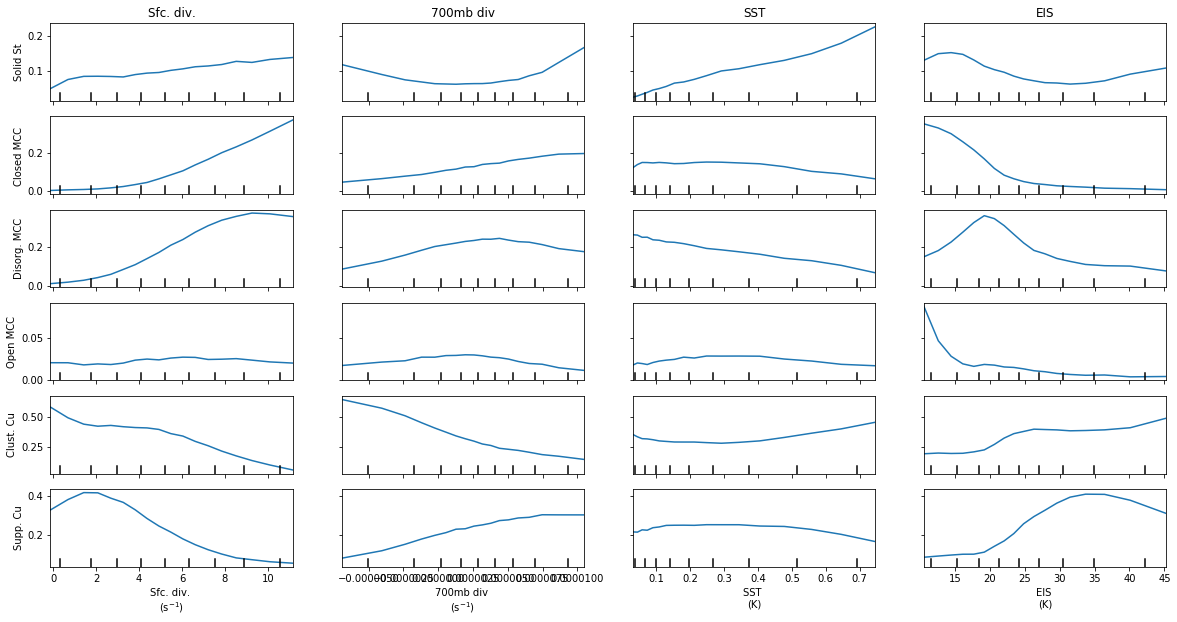

In [130]:
varlist = ['MERRA2_EIS', 'MERRA2_LTS']
varlist = vars_to_use
varlist = ['MERRA2_EIS', 'MERRA2_sfc_div', 'MERRA2_RH_700', 'MERRA2_TQV']

fig, ax = plt.subplots(figsize=(20,10), nrows=len(short_labels), ncols=len(varlist), sharey='row', sharex='col')
for i, var in enumerate(varlist):
    df['quantile'], bins = pd.qcut(df[var], 20, retbins=True)
    df_grouped = df.groupby(['quantile'])
    bins_mids = (bins[1:]+bins[:-1])/2
    deciles, d_bins = pd.qcut(df[var], 10, retbins=True)
    dec_bin_mids = (d_bins[1:]+d_bins[:-1])/2
#     for j, (cloud_name, cloud_type) in enumerate(short_labels.items()):
    for j, cloud_name in enumerate(ordering):
        cloud_type = short_labels[cloud_name]
        probs = []
        for dec in sorted(df_grouped.groups.keys()):
            subs = df_grouped.get_group(dec)
            a = sum(subs.rf_pred==cloud_name)/len(subs)
            probs.append(a)
        ax[j, i].plot(bins_mids[1:-1], probs[1:-1])
        if i == 0:
            ax[j,i].set_ylabel(cloud_type)
        if j == 0:
            ax[j,i].set_title(var_labels[i])
        if j == len(short_labels)-1:
            ax[j,i].set_xlabel(f'{var_labels[i]} \n({var_units[i]})')   
#         ylims = ax[j,i].get_ylim()
        ax[j,i].set_xlim((bins_mids[1], bins_mids[-2]))
        for b in d_bins:
            ax[j,i].axvline(b,  ymax=0.1, c='k')

In [127]:
pca_data = pickle.load(open('/home/disk/eos4/jkcm/Data/MEASURES/classified_data/PCA_data.pickle',  "rb" ))
df_pca = pd.DataFrame(pca_data['x_train'], columns = [f'PC{i+1}' for i in range(8)])
df_pca['cat'] = pca_data['y_train']
cols = ['"temperature"', '"stability"', '"l.s. subs."', '"windiness"', '"moisture"', '"warm adv."', 
        '"surface div."', '"surface pres."']

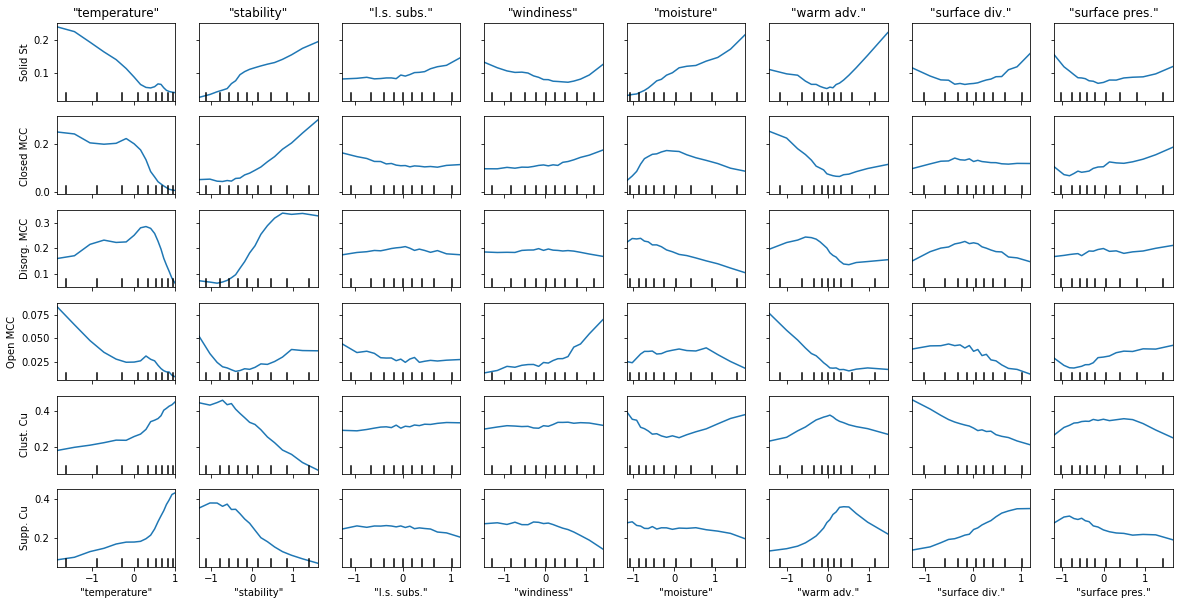

In [129]:
varlist = ['MERRA2_EIS', 'MERRA2_LTS']
varlist = vars_to_use
varlist = [f'PC{i+1}' for i in range(8)]

fig, ax = plt.subplots(figsize=(20,10), nrows=len(short_labels), ncols=len(varlist), sharey='row', sharex='col')
for i, var in enumerate(varlist):
    df_pca['quantile'], bins = pd.qcut(df_pca[var], 20, retbins=True)
    df_grouped = df_pca.groupby(['quantile'])
    bins_mids = (bins[1:]+bins[:-1])/2
    deciles, d_bins = pd.qcut(df_pca[var], 10, retbins=True)
    dec_bin_mids = (d_bins[1:]+d_bins[:-1])/2
#     for j, (cloud_name, cloud_type) in enumerate(short_labels.items()):
    for j, cloud_name in enumerate(ordering):
        cloud_type = short_labels[cloud_name]
        probs = []
        for dec in sorted(df_grouped.groups.keys()):
            subs = df_grouped.get_group(dec)
            a = sum(subs.cat==cloud_name)/len(subs)
            probs.append(a)
        ax[j, i].plot(bins_mids[1:-1], probs[1:-1])
        if i == 0:
            ax[j,i].set_ylabel(cloud_type)
        if j == 0:
            ax[j,i].set_title(cols[i])
        if j == len(short_labels)-1:
            ax[j,i].set_xlabel(f'{cols[i]}')   
#         ylims = ax[j,i].get_ylim()
        ax[j,i].set_xlim((bins_mids[1], bins_mids[-2]))
        for b in d_bins:
            ax[j,i].axvline(b,  ymax=0.1, c='k')

In [185]:
ptps = []
for axi in ax.flatten():
    line_data = axi.get_children()[1].get_ydata()
    pdp = np.ptp(line_data)/np.max(line_data)
    ptps.append(pdp)
#     if np.ptp(line_data) < 0.1:
#         ax.set_facecolor('grey')

(array([0.10416667, 0.27083333, 0.41666667, 0.5625    , 0.64583333,
        0.6875    , 0.75      , 0.85416667, 0.9375    , 1.        ]),
 array([0.05218739, 0.13664724, 0.2211071 , 0.30556695, 0.39002681,
        0.47448666, 0.55894652, 0.64340637, 0.72786623, 0.81232608,
        0.89678594]),
 <a list of 10 Patch objects>)

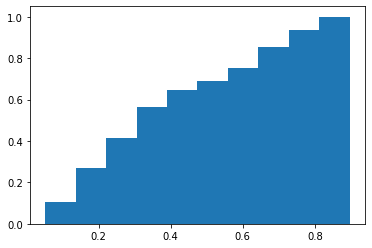

In [187]:
plt.hist(ptps, cumulative=True, density=True)

In [4]:

model_save_dict =  pickle.load(open(f'/home/disk/eos4/jkcm/Data/MEASURES/models/simple_rf_pca_model.pickle', "rb" )) 

rf = model_save_dict['model']

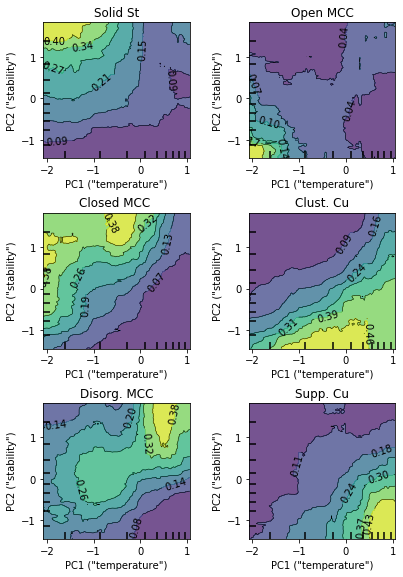

In [220]:
fig, ax = plt.subplots(figsize=(10,20), ncols=3, nrows=6)#, sharey='col', sharex='col')
short_labels = {0: 'Closed MCC ', 1: 'Clust. Cu', 2: 'Disorg. MCC',
        3: 'Open MCC', 4: 'Solid St', 5: 'Supp. Cu'}

cols = ['"temperature"', '"stability"', '"l.s. subsidence"', '"windiness"', '"moisture"', '"warm adv."', 
        '"surface divergence"', '"surface pressure"', '', '', '', '', '']
new_names = [f'PC{i+1} ({c})' for i,c in enumerate(cols)]
ordering = [4, 0, 2, 3, 1, 5]
ct = 1
for i,cat in enumerate(ordering):
    try:
        pdp = pickle.load(open(f'/home/disk/eos4/jkcm/Data/MEASURES/pdp/ver1_pdp_target_2d_{cat}.pickle', "rb" ));
    except IOError as e:
        print(e)
        continue
    pdp.feature_names = new_names
    plt.close(pdp.figure_)
    pdp.plot(ax=ax[i,:])
    oldlab = ax[i,0].get_ylabel()
#     ax[i,0].set_ylabel(short_labels[cat]+'\n\n\n' + oldlab)
    ax[i,0].set_title(short_labels[cat])
    
    
    
    
    
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for axi in ax[:,1:].flatten():
    fig.delaxes(axi)


ax[3,0].set_position(ax[0,1].get_position())
ax[4,0].set_position(ax[1,1].get_position())
ax[5,0].set_position(ax[2,1].get_position())

# ax2.set_position(pos1)



    
# ax.
    
fig.savefig('/home/disk/p/jkcm/plots/dissertation/pdplots_2d.png', bbox_inches='tight')

# for axi in ax[:,1:].flatten():
#     axi.set_ylabel('')

# for i, lab in short_labels.items():
#     ax[i,0]
    
# for j, mode in enumerate(cols):
#     ax[0,j].set_title(mode)
# fig.show()